In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Step 1: Create a small sample spam dataset
# The dataset contains text messages and their labels ("spam" or "ham").
data = {'message': [
    "Win lottery now!", "Meeting at 3 PM", "Free gift card available", 
    "Call mom", "Earn money quickly", "Let's go for a movie"],
        'label': ["spam", "ham", "spam", "ham", "spam", "ham"]}

In [3]:
# Convert dictionary into a pandas DataFrame
df_spam = pd.DataFrame(data)
df_spam

,message,label
0,Win lottery now!,spam
1,Meeting at 3 PM,ham
2,Free gift card available,spam
3,Call mom,ham
4,Earn money quickly,spam
5,Let's go for a movie,ham


In [4]:
# Step 2: Convert text into numerical data using CountVectorizer
vectorizer = CountVectorizer()  # Converts words into frequency vectors
X = vectorizer.fit_transform(df_spam['message'])  # Transform messages into numeric form
y = df_spam['label']  # Target variable (spam or ham)

In [5]:
# Step 3: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Step 4: Train a Naive Bayes classifier (suitable for text classification)
spam_classifier = MultinomialNB()
spam_classifier.fit(X_train, y_train)  # Fit model to training data

MultinomialNB()

In [7]:
# Step 5: Evaluate the model's performance
y_pred = spam_classifier.predict(X_test)  # Predict on test set
print("Spam Classifier Accuracy:", accuracy_score(y_test, y_pred))  # Print accuracy
print(classification_report(y_test, y_pred))  # Print detailed classification report

Spam Classifier Accuracy: 0.5
              precision    recall  f1-score   support

         ham       0.50      1.00      0.67         1
        spam       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
# Step 6: Function to check if a message is spam or not
def check_spam():
    user_message = input("Enter a message to check if it's spam or not: ")  # Take user input
    transformed = vectorizer.transform([user_message])  # Convert text to numerical form
    prediction = spam_classifier.predict(transformed)[0]  # Make prediction
    #Since we are predicting for one input message, the array contains only one element.
    #[0] extracts the first (and only) element from this array,converting it into a simple string ('spam' or 'ham')
    print(f"Prediction: The message is **{prediction.upper()}**")  # Print result

# Step 7: Run the function to check user input messages
check_spam()

Enter a message to check if it's spam or not:  Free ticket


Prediction: The message is **SPAM**


In [9]:
# Task 2: Correlations and PCA

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the Boston dataset
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\boston.csv", header=None, 
                 names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                        'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], sep=r'\s+') # Use space as a separator since data is space-separated
print(np.shape(df))

(506, 14)


             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

<Axes: >

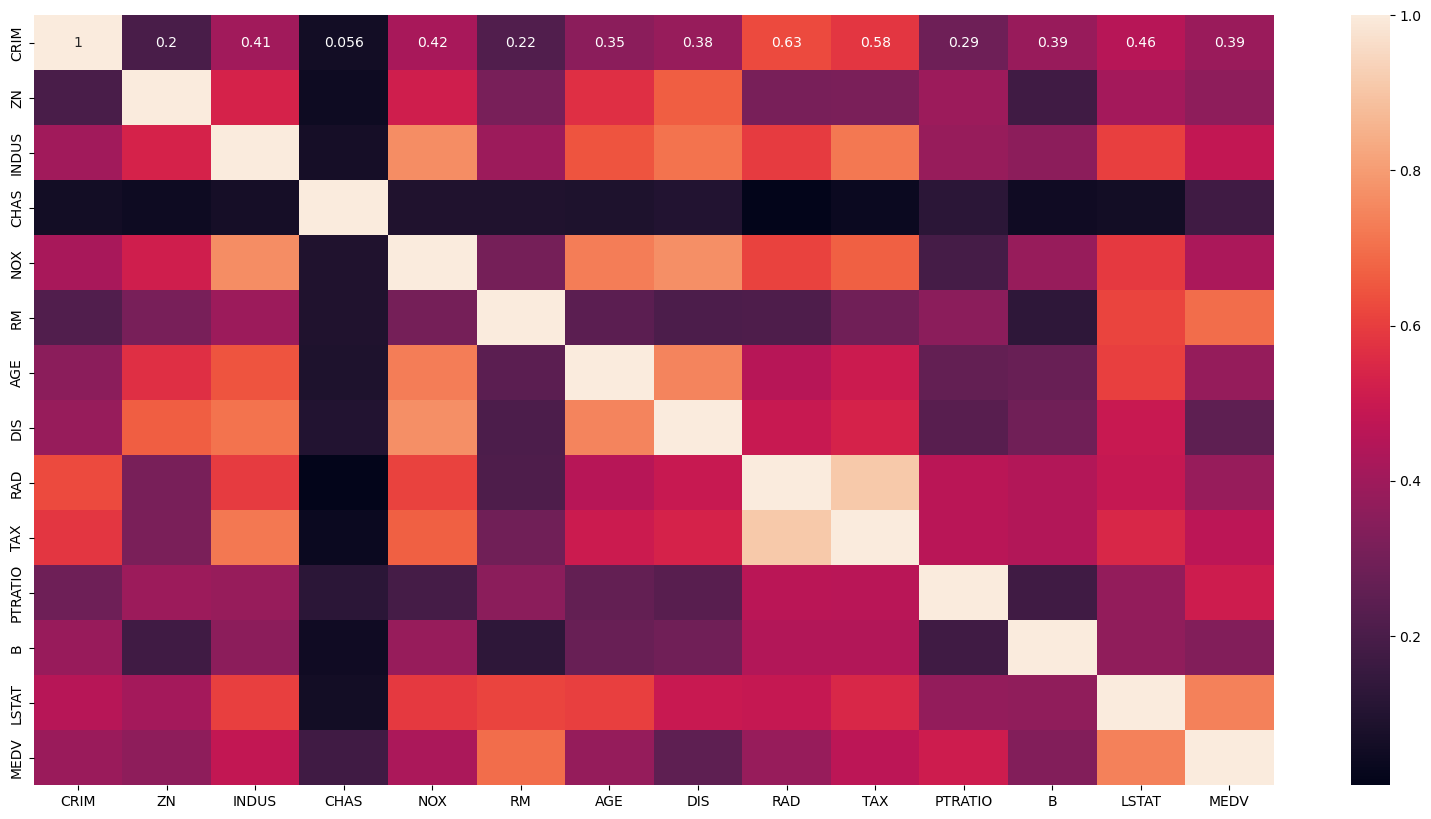

In [10]:
# Step 2: Find Features with Highest Correlation to "MEDV"
correlations = df.corr()['MEDV'].sort_values(ascending=False) # Absolute correlation values for better visibility
print(df.corr())  # Displays the full correlation matrix
print("Highest Correlations with MEDV:")
print(correlations[1:4])  # Print top 3 features (excluding MEDV itself)
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

          CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
PC1   0.250951 -0.256315  0.346672  0.005042  0.342852 -0.189243  0.313671   
PC2  -0.315252 -0.323313  0.112493  0.454829  0.219116  0.149332  0.311978   
PC3   0.246566  0.295858 -0.015946  0.289781  0.120964  0.593961 -0.017675   
PC4   0.061771  0.128712  0.017146  0.815941 -0.128226 -0.280592 -0.175206   
PC5  -0.082157 -0.320617  0.007811 -0.086531 -0.136854  0.423447 -0.016691   
PC6   0.219660  0.323388  0.076138 -0.167490  0.152983 -0.059267  0.071709   
PC7   0.777607 -0.274996 -0.339576  0.074136 -0.199635  0.063940  0.116011   
PC8  -0.153350  0.402680 -0.173932  0.024662 -0.080121  0.326752  0.600823   
PC9   0.260390  0.358137  0.644416 -0.013728 -0.018522  0.047898 -0.067562   
PC10 -0.019369 -0.267527  0.363532  0.006182 -0.231056  0.431420 -0.362779   
PC11  0.109644 -0.262756  0.303169 -0.013927 -0.111319 -0.053162  0.459159   
PC12  0.086761 -0.071425 -0.113200 -0.003983  0.804323  0.152873

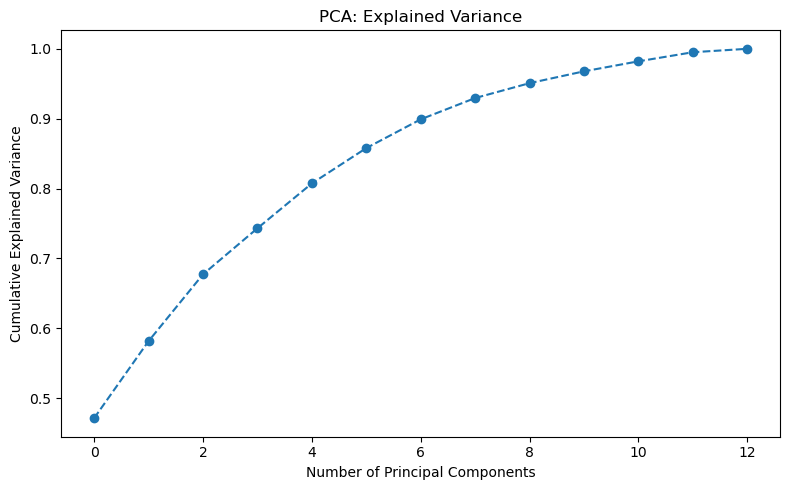

In [13]:
# Step 3: Standardization of Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['MEDV']))  # Exclude target variable

# Step 4: Apply PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)
# Convert PCA results into a DataFrame for easy viewing
df_pca_df = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

# Create a DataFrame showing how original features contribute to each Principal Component
pc_features = pd.DataFrame(pca.components_, columns=df.drop(columns=['MEDV']).columns, 
                           index=[f'PC{i+1}' for i in range(len(pca.components_))])

# Display the first few rows
print(pc_features)

# Step 5: Plot Cumulative Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA: Explained Variance")
plt.tight_layout()
plt.show()

In [14]:
#task3
# Define input features (X) and target variable (y)
X = df.drop(columns=['MEDV'])  # All features except the target
y = df['MEDV']  # House price (target variable)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


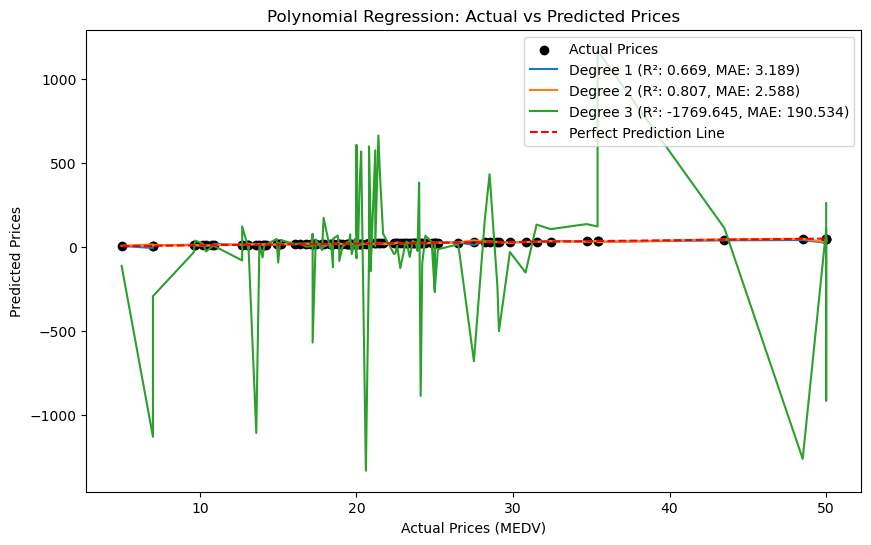

   Polynomial Degree     R² Score         MAE
0                  1     0.668759    3.189092
1                  2     0.806589    2.587930
2                  3 -1769.644511  190.534486


In [24]:
# Apply Polynomial Feature Transformation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
# Step 4: Initialize lists to store R² scores and MAE for different polynomial degrees
# Import necessary libraries
import pandas as pd  # For data handling
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation
from sklearn.linear_model import LinearRegression  # For polynomial regression model
from sklearn.metrics import mean_absolute_error, r2_score  # For model evaluation

# Step 1: Load the dataset
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\boston.csv", header=None, 
                 names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                        'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], 
                 sep=r'\s+')  # Use whitespace as separator

# Step 2: Define input features (X) and target variable (y)
X = df.drop(columns=['MEDV'])  # Selecting all features except the target variable
y = df['MEDV']  # Target variable (house price)

# Step 3: Split the dataset into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize lists to store R² scores and MAE for different polynomial degrees
r2_scores = []
mae_scores = []
degrees = [1, 2, 3]  # Degrees of polynomial to test

# Step 5: Sort test data for smoother line plotting
sorted_indices = np.argsort(y_test)  # Get the indices that would sort y_test in ascending order
y_test_sorted = np.array(y_test)[sorted_indices]  # Reorder y_test to be in increasing order

# Step 6: Create a scatter plot for actual house prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color="black", label="Actual Prices")  # Black dots represent actual house prices

# Step 7: Train and evaluate Polynomial Regression models for degrees 1 to 3
for degree in degrees:
    # Transform input features into polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train Polynomial Regression Model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predict house prices using the model
    y_pred = model.predict(X_test_poly)

    # Compute R² score and Mean Absolute Error (MAE)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store the R² and MAE scores for comparison
    r2_scores.append(r2)
    mae_scores.append(mae)

    # Sort predictions for a smoother line plot
    y_pred_sorted = np.array(y_pred)[sorted_indices]

    # Line plot for predicted values
    plt.plot(y_test_sorted, y_pred_sorted, linestyle='-', label=f"Degree {degree} (R²: {r2:.3f}, MAE: {mae:.3f})")

# Step 8: Plot a reference line for perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle="--", color="red", label="Perfect Prediction Line")

# Step 9: Customize and display the plot
plt.xlabel("Actual Prices (MEDV)")  # Label for x-axis
plt.ylabel("Predicted Prices")  # Label for y-axis
plt.title("Polynomial Regression: Actual vs Predicted Prices")  # Title of the plot
plt.legend()  # Display legend
plt.show()  # Show the final plot

# Step 10: Display R² and MAE scores for each polynomial degree in a tabular format
results_df = pd.DataFrame({'Polynomial Degree': degrees, 'R² Score': r2_scores, 'MAE': mae_scores})
print(results_df)  # Print the evaluation results

In [23]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [31]:
#task4
# Define input features (X) and target variable (y)
from sklearn.model_selection import train_test_split, cross_val_score  # Splitting and Cross-Validation
X = df.drop(columns=['MEDV'])  # Selecting all features except target variable
y = df['MEDV']  # House price (target variable)

# Standardize the features
scaler = StandardScaler()  # Initialize StandardScaler
X_scaled = scaler.fit_transform(X)  # Standardize the features

# Split data into Training (80%) and Testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Perform Cross-Validation (CV=5)
cv_r2 = cross_val_score(rf_regressor, X_scaled, y, cv=5, scoring='r2').mean()
cv_mae = -cross_val_score(rf_regressor, X_scaled, y, cv=5, scoring='neg_mean_absolute_error').mean()

# Train the model on the full training set
rf_regressor.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate Random Forest Model on test set
r2_rf = r2_score(y_test, y_pred_rf)  # Compute R² score
mae_rf = mean_absolute_error(y_test, y_pred_rf)  # Compute MAE

# Print evaluation results
print(f"Cross-Validation Avg R² Score: {cv_r2:.4f}")
print(f"Cross-Validation Avg MAE: {cv_mae:.4f}")
print(f"Random Forest Regression R² Score on Test Data: {r2_rf:.4f}")
print(f"Random Forest Regression MAE on Test Data: {mae_rf:.4f}")

Cross-Validation Avg R² Score: 0.6276
Cross-Validation Avg MAE: 3.0254
Random Forest Regression R² Score on Test Data: 0.8919
Random Forest Regression MAE on Test Data: 2.0474


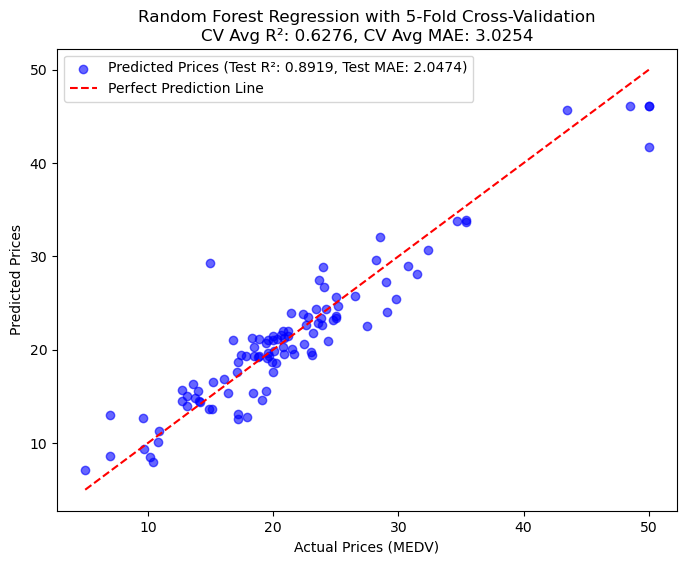

In [32]:
# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color="blue", alpha=0.6, 
            label=f"Predicted Prices (Test R²: {r2_rf:.4f}, Test MAE: {mae_rf:.4f})")  # Scatter plot with Test R² and MAE
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
         linestyle="--", color="red", label="Perfect Prediction Line")  # Reference line

# Add model performance scores in the title
plt.xlabel("Actual Prices (MEDV)")
plt.ylabel("Predicted Prices")
plt.title(f"Random Forest Regression with 5-Fold Cross-Validation\nCV Avg R²: {cv_r2:.4f}, CV Avg MAE: {cv_mae:.4f}")
plt.legend()  # Display legend with CV scores
plt.show()